# 프로젝트 개요
## 주제 : 데이콘베이직 심장 질한 예측
- 환자의 나이, 콜레스테롤 수치 등의 정보를 바탕으로 심장 질환 유무를 예측

## 주안점
- 혼자서 처음부터 끝까지 해보기
- 시간이 없으니 이미 가공된 데이터로(데이콘)
- 구현뿐만이 아닌 데이터 의미를 깊이 고민할 수 있도록 구조나 속성이 단순한 걸로
- 데이터를 해석하고 이해하고 싶음


## 일정
- 21.12.24 10:00 ~ 16:00 (대회종료일 24일 18:00)
    - 10:00 ~ 13:30 : 대회규칙, 데이터 명세, 베이스라인 파악 및 정리
    - 13:30 ~ 14:30 : 데이터 탐색, 시각화, 모델링 계획
    - 14:30 ~ 15:00 : 테스트 모델링
    - 15:00 ~ 15:30 : 중간 점검
    - 15:30 ~ 16:30 : 모델링 고도화 및 튜닝, 정리&제출
    - 16:30 ~ 18:00 : 프로젝트 발표

## 평가
- 리더보드 f1-score

## 데이터 명세 train.csv
- id: 데이터 고유 id
- age: 나이
- sex: 성별 (여자 = 0, 남자 = 1)
- **cp: 가슴 통증(chest pain) 종류**
    - 0 : asymptomatic 무증상
    - 1 : atypical angina 일반적이지 않은 협심증
    - 2 : non-anginal pain 협심증이 아닌 통증
    - 3 : typical angina 일반적인 협심증
- trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
- chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
- fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
- **restecg: (resting electrocardiographic) 휴식 중 심전도 결과** 
    - 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - 1: 정상
    - 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- thalach: (maximum heart rate achieved) 최대 심박수
- exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
- oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
- **slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기**
    - 0: downsloping 하강
    - 1: flat 평탄
    - 2: upsloping 상승
- ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 
    **Null 값은 숫자 4로 인코딩됨** 
- thal: thalassemia 지중해빈혈 여부
    - **0 = Null** 
    - 1 = normal 정상
    - 2 = fixed defect 고정 결함
    - 3 = reversable defect 가역 결함
- target: 심장 질환 진단 여부
    - 0: < 50% diameter narrowing
    - 1: > 50% diameter narrowing

# [Baseline] 입문자를 위한 EDA 샘플

## 데이터 불러오기

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline

train = pd.read_csv('../dacon_heart/dataset/train.csv')
train

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
147,148,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
148,149,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,150,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [13]:
# 결측치 확인
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(dataframe.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(train)

결측치가 존재하지 않습니다


이번 데이콘 베이직 역시 결측치가 존재하지 않습니다.

조금 더 수월하게 EDA를 진행할 수 있을것 같습니다!

## 기초 통계 분석 & 히스토그램 

정형 데이터는 먼저 기초 통계량을 파악하면 데이터를 쉽게 이해할 수 있습니다.

In [14]:
# pandas 의 메서드를 이용하면 간단하게 기초 통계량을 확인할 수 있습니다.
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,43.734045,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,1.000000,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,76.000000,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,113.500000,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,151.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


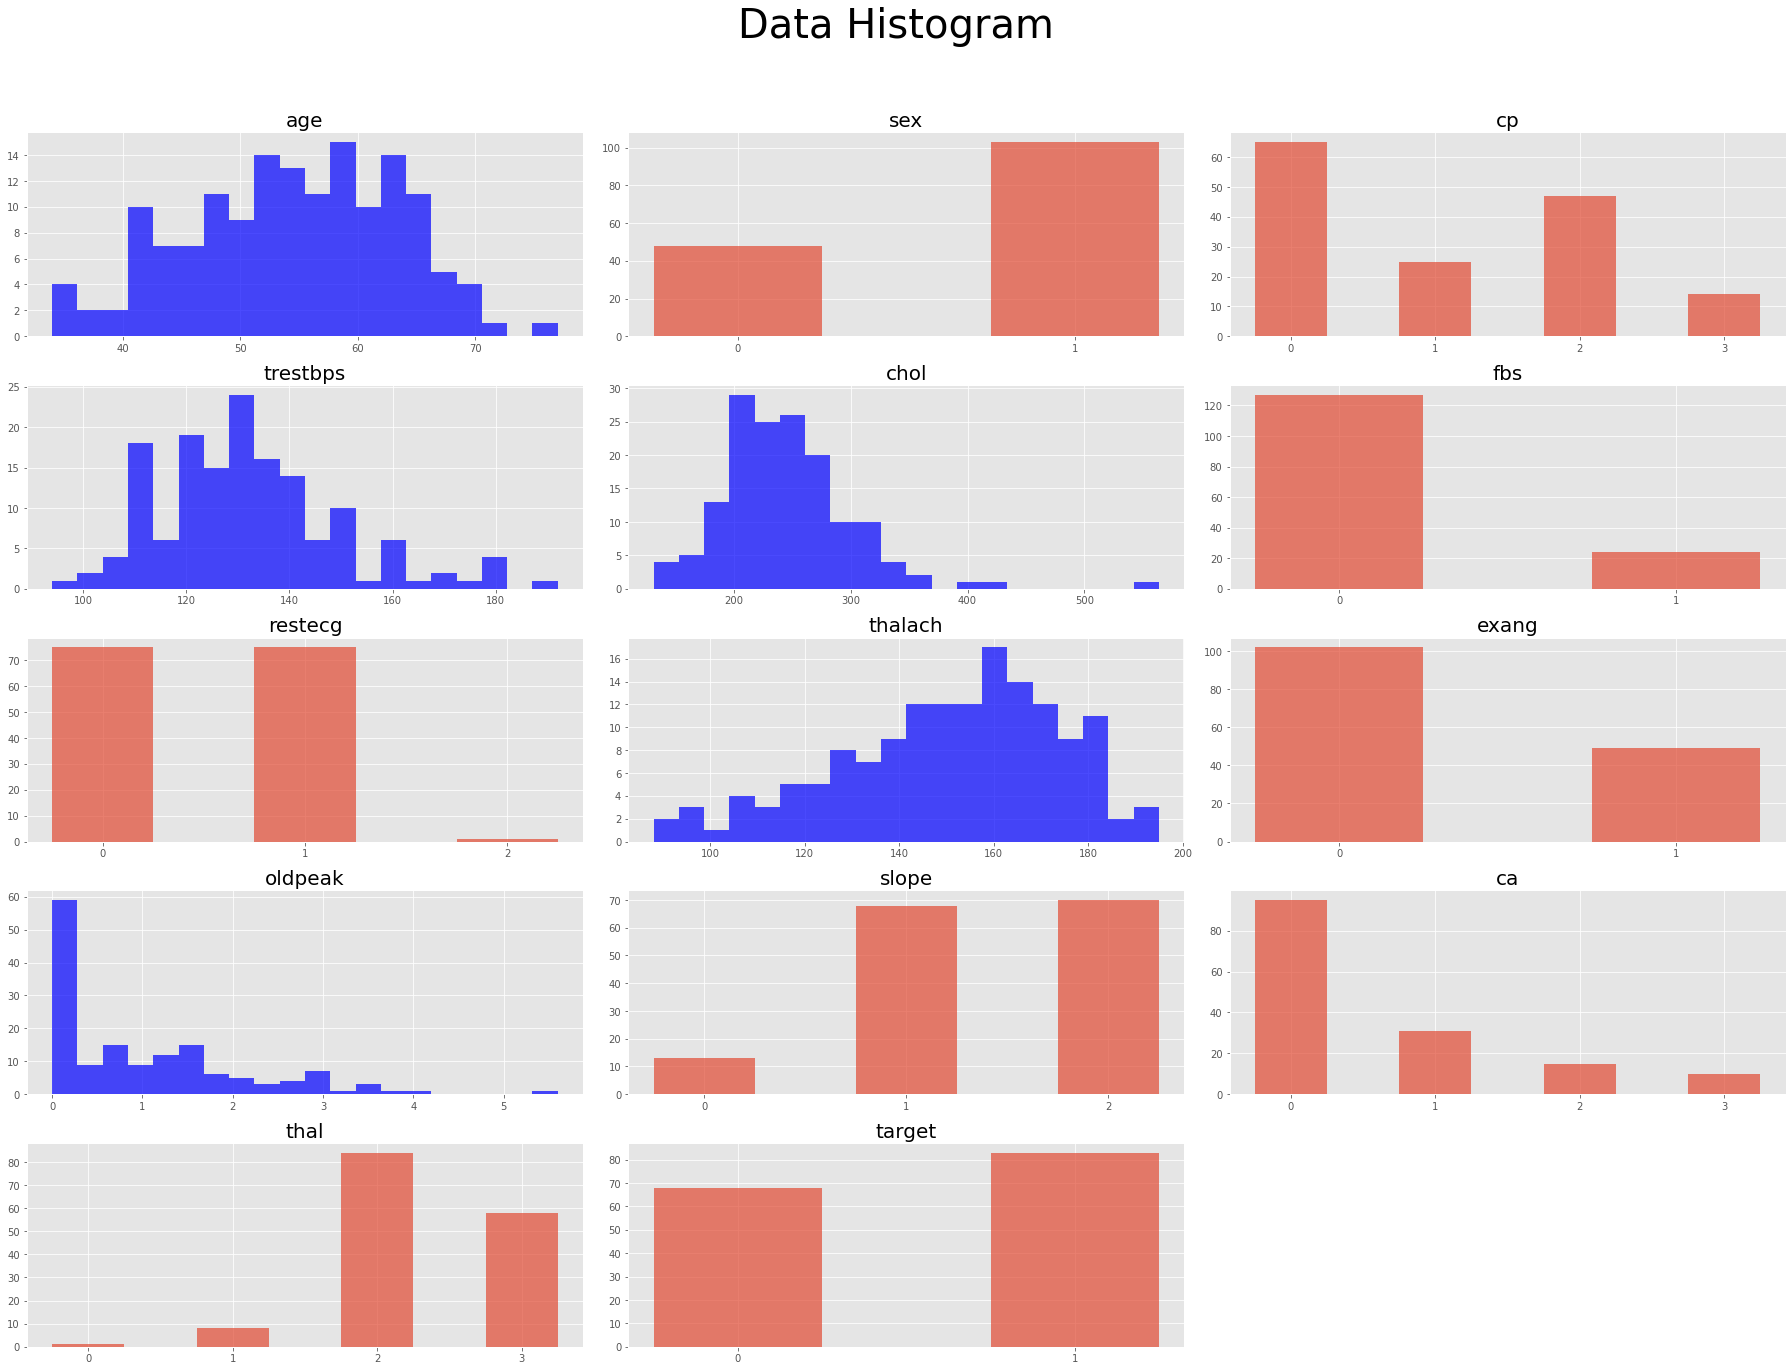

In [15]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = train.columns[1:]
for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 나이(age)는 정규 분포 형태를 이루는 것으로 보입니다.
- 성별(sex)은 남자(1)가 약 2배 정도 되네요.
- oldpeak이 왼쪽으로 치우쳐져 있다는 것이 눈에 띄네요.
- 또한 restecg와 thal의 경우 매우 적은 수의 극단값 클래스가 있다는 것도 알 수 있습니다.
- target은 약간 차이가 있지만 이정도면 심각한 imbalance는 아닌 듯 보입니다.

이번엔 바이올린 차트를 통해 target에 따른 분포를 살펴봅시다.

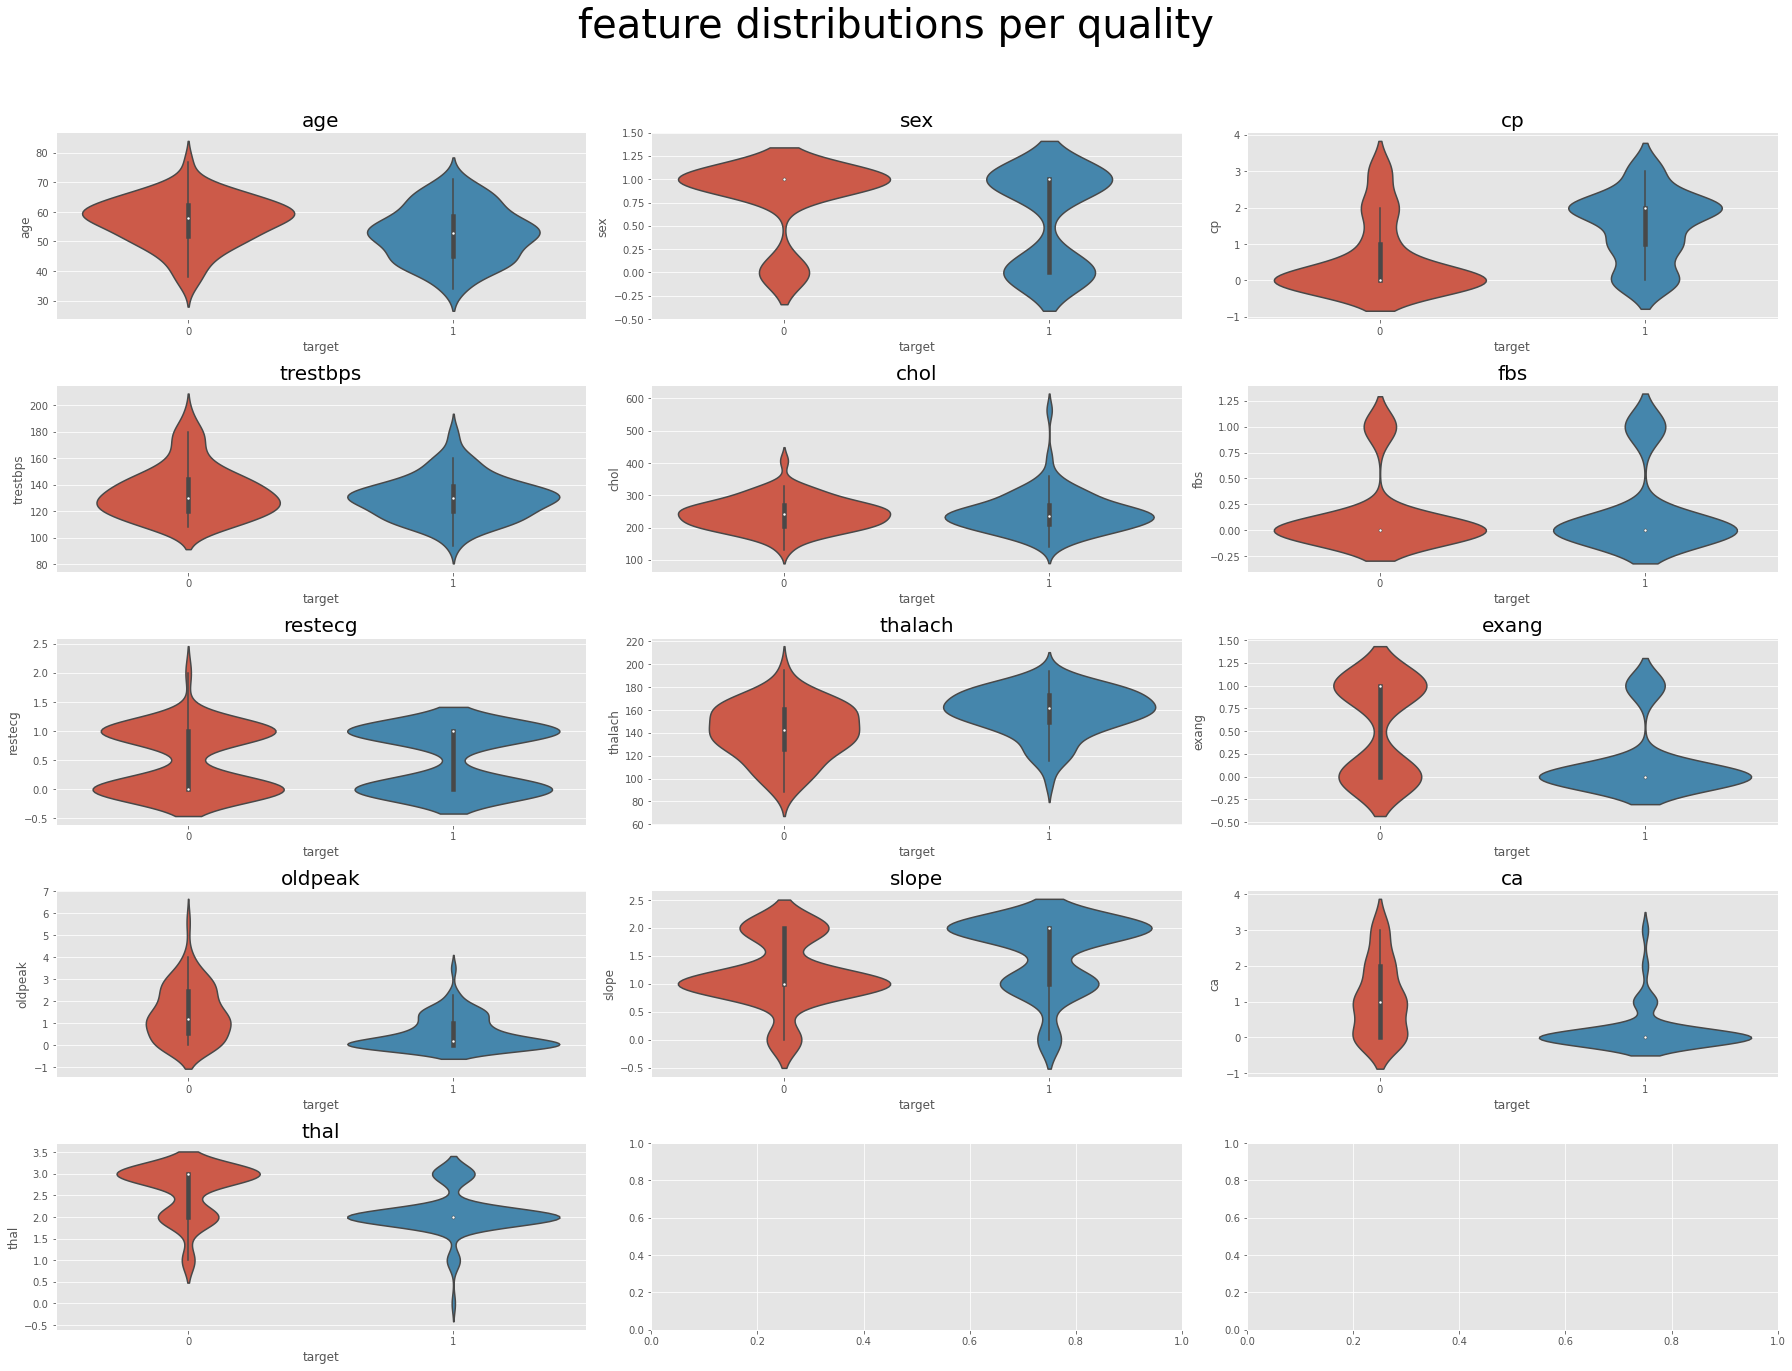

In [16]:
fig, axes = plt.subplots(5, 3, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, train.columns[1:-1]):
    sns.violinplot(x= 'target', y= col, ax=ax, data=train)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


특정 feature에서는 target에 따라 다른 분포를 보여주네요. (cp, exang, oldpeak, slope, ca, thal)

이러한 특징을 잘 활용하면 분석에 많은 도움이 될 것 같습니다!

## 상관관계 확인하기

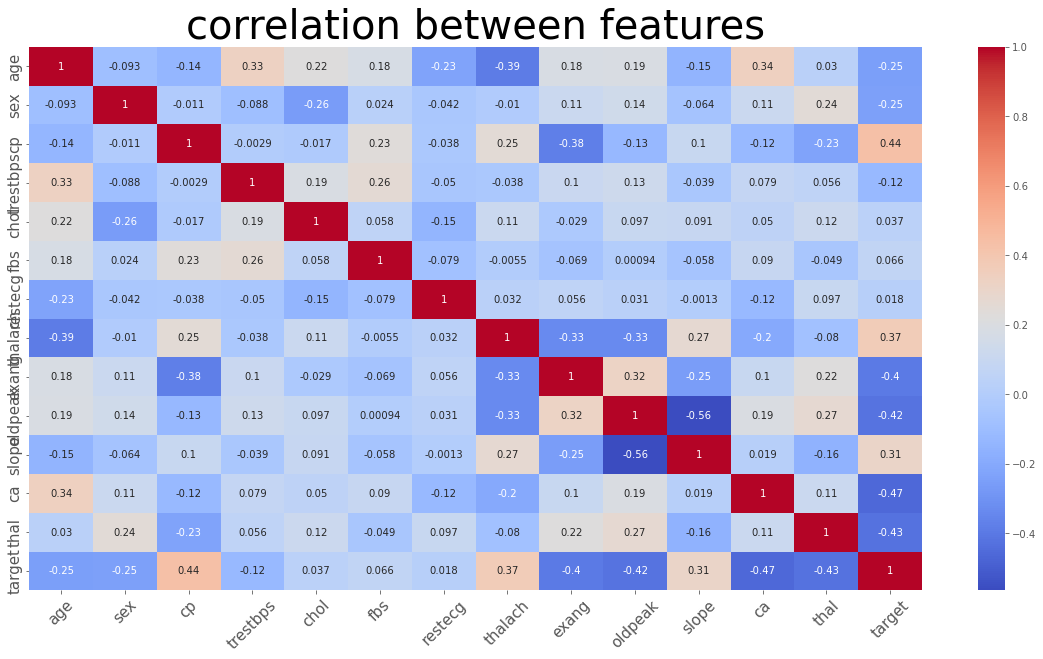

In [17]:
plt.figure(figsize=(20,10))

heat_table = train.drop(['id'], axis=1).corr()
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

상관관계 표를 보니 target과 가장 강한 상관관계를 가진 feature는 ca로, 0.47 정도의 상관관계를 보입니다.

척보기엔 특별히 critical 한 feature가 있는 것 같지는 않습니다.

## PCA 시각화

상관관계가 큰 변수들이 없으니 PCA를 통한 차원 축소 및 시각화를 해봅시다.

PCA란, Principal Component Analysis의 약자로 데이터를 n개의 주성분으로 축소하여 분석하는 방법입니다.

다양한 feature들이 있는 데이터를 x축과 y축만 있는 2D 평면에 표현할 수 있게 해주는 EDA 방법 중 하나이기도 합니다.

In [18]:
from sklearn.preprocessing import StandardScaler 

# 먼저 PCA를 위해 데이터를 표준화해줍니다.
data = train.drop(['id', 'target'], axis=1).values
target = train['target'].values

scaled_data = StandardScaler().fit_transform(data)

In [19]:
from sklearn.decomposition import PCA

# 2D 에 시각화하기 위해 주성분을 2개로 선택합니다.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data=pca_data, columns = ['principal component 1', 'principal component 2'])
principalDf['target'] = target

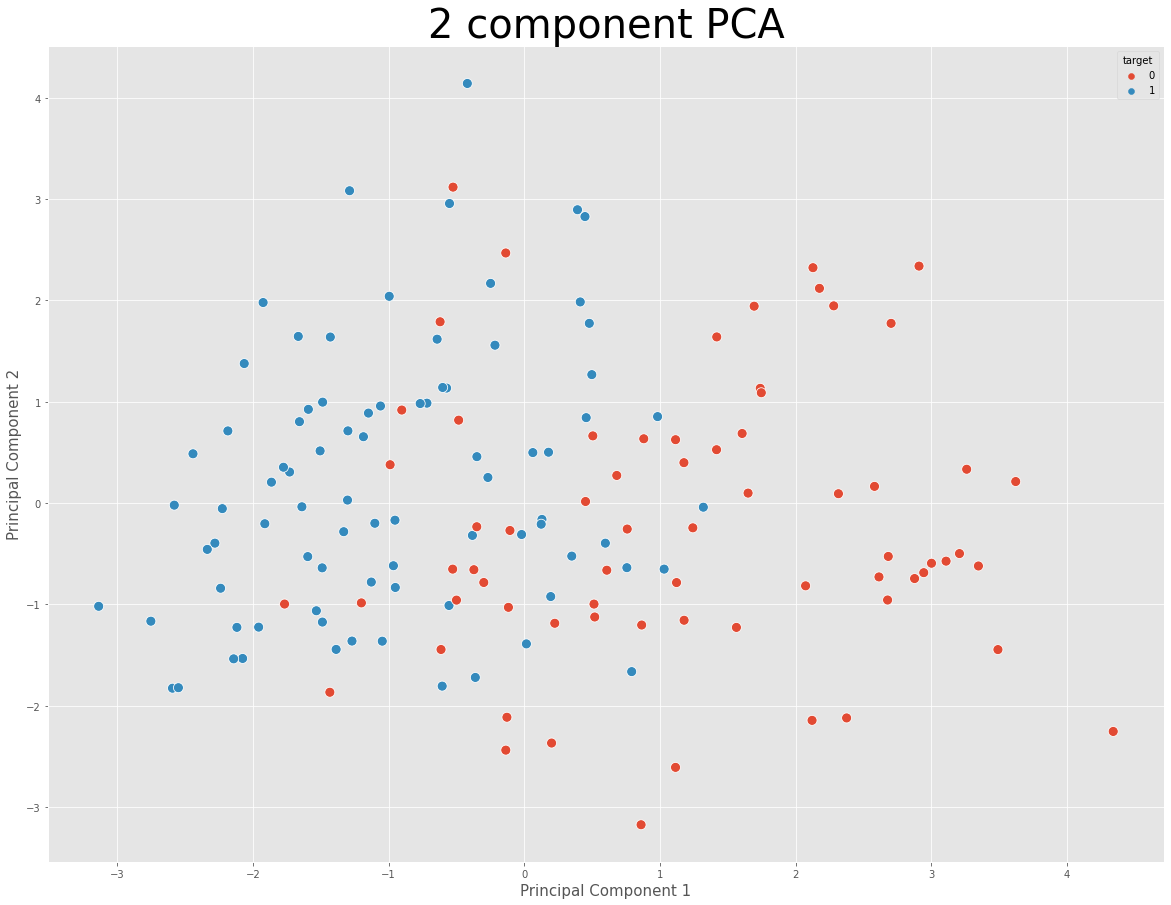

In [20]:
plt.figure(figsize = (20, 15))

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 40)

sns.scatterplot(x='principal component 1', y='principal component 2', data=principalDf, hue='target', s= 100)
plt.show()

정확하게 나뉘지는 않지만

target=0 값들은 대부분 오른쪽에 분포되어 있고,

target=1 값들은 대부분 왼쪽에 분포되어 있는 모습을 볼 수 있네요.

# [Baseline] 입문자를 위한 데이터분석&예측 1

## 데이터 불러오기

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

heart_data = pd.read_csv('../dacon_heart/dataset/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/train.csv'

In [ ]:
heart_data.head()

이번 데이터는 문자열로 이루어진 데이터가 없어 따로 라벨 인코딩을 진행하지 않아도 됩니다.

하지만 이들의 생김새는 조금씩 달라보입니다.

cp는 데이터 명세를 살펴보면 가슴 통증의 종류로 나와있습니다.

따라서 age, chol과같이 수치를 나타낸다기보다 '종류'로 생각할 수 있습니다.

때문에 0, 1, 2, 3 이외에 다른 값을 가지지 않습니다. 

즉, 위의 데이터는 이미 라벨인코딩이 되어 우리에게 도착한 데이터라 생각해도 무방할 것입니다.

## 결측치 확인

데이터에 결측치가 존재하는지 확인해보겠습니다.

In [ ]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

check_missing_col(heart_data)

## 모델 학습

가장 간단한 분류 모델 중 하나인 LogisticRegression을 이용하여 학습을 진행하고 성능을 측정해보겠습니다.

모델은 환자의 진단 기록을 바탕으로 심장병을 진단해야하기 때문에

진단 기록이 X, 심장병 여부를 y로 설정하겠습니다.

In [ ]:
X = heart_data.iloc[:, 1:-1] # id와 target을 제거
y = heart_data.iloc[:, -1] # target만 선택

이제 LogisticRegression으로 모델을 학습시킨 뒤 정확도와 f1 score를 측정해 보겠습니다

In [ ]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X, y)

logistic_preds = logistic_regression_model.predict(X)

print(f'accuracy: {sum(logistic_preds == y) / len(y)}')
print(f'f1_score : {f1_score(y, logistic_preds)}')

## F1 score?

이번 대회의 평가 산식(metric)은 F1 score 입니다.

F1 score가 무엇일까요?

f1 score는 정밀도(precision)와 재현률(recall)의 조화평균입니다.

그렇다면 정밀도와 재현률은 무엇일까요?

<img src= "https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png" alt="nn_image" height="700" width="600">

*CC-BY-SA 4.0* [Walber](https://commons.wikimedia.org/wiki/User:Walber)  *[위키피디아](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8)*

정밀도는 모델이 심장병에 걸렸다 예측한 사람들 중에서 실제로 심장병이 있는 사람의 비율

재현률은 실제로 심장병이 있는 사람들 중 모델이 심장병에 걸렸다 예측한 비율입니다.

의료데이터를 분석하여 질병을 예측하는 모델을 만들 때 정밀도와 재현률 중 무엇에 더 중점을 두어야 할까요?

경우에 따라 다르겠지만, 질병에 걸린 사람에게 질병이 걸렸다고 정확히 알려주는 것이 중요할 것입니다. 

그래야 실제로는 병에 걸렸는데도 불구하고 병이 없다고 진단하는 일이 적을테니까요. 

즉, 재현률이 높은 모델이 좋은 모델일 것입니다.

하지만 정밀도 역시 모델의 중요한 지표중 하나입니다.

f1 score는 이 정밀도와 재현률의 조화평균입니다.

조화 평균을 사용하기 때문에 정밀도와 재현률 중 점수가 더 낮은 쪽에 가까운 점수를 산출합니다.

따라서 정밀도와 재현률 모두를 높이는 방향의 모델링이 진행되어야만 f1-score를 올릴 수 있는 것이죠.

위에서 f1 score를 확인해 보았으니 이번엔 정밀도와 재현률을 확인해 보겠습니다.

In [ ]:
heart_data['preds'] = logistic_preds # dataframe에 예측값 삽입

predict_positive = heart_data[heart_data['preds'] == 1] # 심장병이 있다 예측한 데이터
predict_negative = heart_data[heart_data['preds'] == 0] # 심장병이 없다 예측한 데이터

true_positive = predict_positive[predict_positive['target'] == 1] # 심장병이 있다고 예측한 데이터에서 실제로 심장병이 있는 사람들의 데이터
false_positive = predict_positive[predict_positive['target'] == 0] # 심장병이 있다고 예측한 데이터에서 실제로는 심장병이 없는 사람들의 데이터

true_negative = predict_negative[predict_negative['target'] == 0] # 심장병이 없다고 예측한 데이터에서 실제로 심장병이 없는 사람들의 데이터
false_negetive = predict_negative[predict_negative['target'] == 1] # 심장병이 없다고 예측한 데이터에서 실제로는 심장병이 있는 사람들의 데이터



# 정밀도: 모델이 심장병이 있다고 예측한 사람들중 실제로 심장병이 있는 사람의 비율
precision = len(true_positive) / (len(true_positive) + len(false_positive))

# 재현율 : 실제로 심장병이 있는 사람들중 모델이 심장병이 있다 예측한 사람의 비율
recall = len(true_positive) / (len(true_positive) + len(false_negetive))

f1 = 2 * precision * recall / (precision + recall)


print(f'정밀도: {precision}')
print(f'재현율: {recall}')
print(f'f1 스코어: {f1}')

개인적으로는 정밀도보다 재현율이 높아 비교적 좋은 결과를 얻었다 이야기할 수 있을것같습니다!

모델이 어떻게 예측하였는지 위의 데이터를 통해서 확인해 볼 수 있을것 같은데요 

confusion matrix로 시각화해보도록 하겠습니다.

In [ ]:
confusion_matrix = np.array([[len(true_negative), len(false_positive)], 
                             [len(false_negetive), len(true_positive)]])
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, annot_kws={'fontsize': 20}, cmap='Blues')
plt.xlabel('prediction', fontsize=20)
plt.ylabel('Real', fontsize=20)
plt.title('Confusion matrix', fontsize = 40)

## 모델의 예측이 틀린 데이터들

그럼 어떤 경우에 모델이 예측을 잘못한 것일까요?

한번 살펴봅시다!

In [ ]:
false_negetive # 모델이 심장병이 없다 예측하였지만 실제로 심장병이 있는 사람들의 데이터

In [ ]:
false_positive # 모델이 심장병이 있다 예측하였지만 실제로 심장병이 없는 사람들의 데이터

위의 데이터들의 특징을 분석하면 더 좋은 모델을 만들 수 있지 않을까요?

이제 test set으로 예측 후 제출파일을 만들고 베이스라인을 마무리하도록 하겠습니다.

In [ ]:
test_set = pd.read_csv('./data/test.csv')
test_set.head()

In [ ]:
test_X = test_set.iloc[:, 1:] #id 제외 후 모든 데이터를 사용 

test_preds = logistic_regression_model.predict(test_X)

In [ ]:
submission = pd.read_csv('./data/sample_submission.csv')
submission['target'] = test_preds

submission.to_csv('baseline.csv', index=False)

# [Baseline] 입문자를 위한 모델 성능 향상(단계적 회귀

## 단계적 회귀 (Stepwise Regression)

심장 질환을 예측하기 위해서는 데이터의 여러가지 feature 들을 분석해야 합니다.

그러나 모든 feature 들이 모두 target 에 유의미한 영향을 끼치는 것은 아닙니다. 

어떤 feature 들은 target 에 더 큰 영향을 미치기도 하며 어떤 feature 들은 상대적으로 적은 영향을 끼치기도 합니다. 

단계적 회귀는 데이터의 이러한 특성을 이용합니다. target 에의 영향력이 약한 feature 부터 단계적으로 제외해 나가며 가장 영향력이 큰 feature들만을 분석에 사용하는 기법입니다.

이번 베이스라인 코드에서는 feature 가 target 에 행사하는 영향력을 상관관계로 정의하겠습니다. 

In [32]:
# target과 다른 feature들의 상관계수는 아래와 같습니다.
corr_score = abs(heat_table.target[:-1])

# 상관계수 절대값을 기준으로 내림차순으로 정렬합니다.
corr_score.sort_values()

restecg     0.017528
chol        0.036991
fbs         0.065821
trestbps    0.122850
sex         0.246289
age         0.247806
slope       0.305994
thalach     0.365249
exang       0.396145
oldpeak     0.421514
thal        0.428530
cp          0.436273
ca          0.466289
Name: target, dtype: float64

확인해보니 restecg -> chol -> fbs -> trestbps -> age -> sex -> slope 순이네요!

따라서 restecg 시작으로 feature들을 제거하며 성능 변화를 확인해보겠습니다.

In [ ]:
# 성능 변화 평가를 위해 data 나누기
X = train.iloc[:, 1:-1] 
Y = train.iloc[:, -1] 

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.5, shuffle=True, random_state=34)

In [ ]:
# 성능 출력 함수
from sklearn.metrics import f1_score

def print_score(predicted, y):
    accuracy = sum(predicted == y) / len(y)*100
    f1 = f1_score(y, predicted)*100
    print(f'accuracy: {accuracy:.2f}%') # 정확도 출력
    print(f'f1_score : {f1:.2f}%') # f1 score 출력
    return accuracy, f1


check_acc = []
check_f1 = []

## 1 단계: feature 삭제 없이 검증

첫 번째 모델로는 모든 feature 들을 사용해 학습한 모델을 만들어 보겠습니다. 

이후 상관관계가 낮은 feature 부터 하나씩 feature 들을 삭제해보며 모델을 만들고 어떤 모델이 가장 성능이 좋은지 살펴봅시다.

In [ ]:
from sklearn.linear_model import LogisticRegression
#1단계 train 데이터 준비
step_1_train_x = x_train.copy()

#1단계 train
LR_step_1_model = LogisticRegression()
LR_step_1_model.fit(step_1_train_x, y_train)
#1단계 validation 데이터 준비
step_1_val_x = x_val.copy()

#1단계 validaion
LR_step_1_preds = LR_step_1_model.predict(step_1_val_x)
acc, f1 = print_score(LR_step_1_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

## 2단계: ["restecg"] feature 삭제

In [ ]:
#2단계 train 데이터 준비
step_2_train_x = x_train.drop("restecg",axis=1)

#2단계 train
LR_step_2_model= LogisticRegression()
LR_step_2_model.fit(step_2_train_x, y_train)

#2단계 validation 데이터 준비
step_2_val_x = x_val.drop("restecg", axis=1)

#2단계 validation
LR_step_2_preds = LR_step_2_model.predict(step_2_val_x)
acc, f1 = print_score(LR_step_2_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

## 3단계: ["restecg" , "thalach"] feature 삭제

In [ ]:
#3단계 train 데이터 준비
step_3_train_x = x_train.drop(["restecg","chol"],axis=1)

#3단계 train 
LR_step_3_model= LogisticRegression()
LR_step_3_model.fit(step_3_train_x, y_train)

#3단계 validation 데이터 준비
step_3_val_x = x_val.drop(["restecg","chol"],axis=1)

#3단계 validation
LR_step_3_preds = LR_step_3_model.predict(step_3_val_x)
acc, f1 = print_score(LR_step_3_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)


## 4단계: ["restecg","chol","fbs"] feature 삭제

In [ ]:
#4단계 train 데이터 준비
step_4_train_x = x_train.drop(["restecg","chol","fbs"],axis=1)

#4단계 train
LR_step_4_model= LogisticRegression()
LR_step_4_model.fit(step_4_train_x,y_train)

#4단계 validaion 데이터 준비
step_4_val_x = x_val.drop(["restecg","chol","fbs"],axis=1)

#4단계 validation
LR_step_4_preds = LR_step_4_model.predict(step_4_val_x)
acc, f1 = print_score(LR_step_4_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

## 5단계: ["restecg","chol","fbs","trestbps"] feature 삭제 

In [ ]:
#5단계 trian 데이터 준비
step_5_train_x = x_train.drop(["restecg","chol","fbs","trestbps"],axis=1)

#5단계 train
LR_step_5_model= LogisticRegression()
LR_step_5_model.fit(step_5_train_x,y_train)

#5단계 validation 데이터 준비
step_5_val_x = x_val.drop(["restecg","chol","fbs","trestbps"],axis=1)

#5단계 validation
LR_step_5_preds = LR_step_5_model.predict(step_5_val_x)
acc, f1 = print_score(LR_step_5_preds,y_val)

check_acc.append(acc)
check_f1.append(f1)

In [ ]:
#5개의 모델들의 성능 비교해보기
step = [1,2,3,4,5]

#plt.bar(step,acc,label="acc")
plt.figure(figsize=(15,10))
plt.plot(step, check_f1, 'bo-', label="f1", color = 'royalblue')
plt.plot(step, check_acc, 'bo-', label='acc', color='lightsteelblue')

plt.title("Score change by feature elimination", size=40)
plt.xlabel("step", size=20)
plt.ylabel("score", size=20)
plt.xticks(step)
plt.legend()
plt.show()

보아하니 feature들을 제거할수록 성능이 높게 나오네요!

## best model train 
단계적 회귀분석을 통해 best model 을 결정했으니 submission 제출을 위해 전체 training set으로 다시 학습합니다.

In [ ]:
best_model_train_x = X.drop(["restecg","chol","fbs","trestbps"],axis=1)

best_model = LogisticRegression()
best_model.fit(best_model_train_x,Y)

## 예측 값 생성 및 제출하기

학습한 모델을 사용하여 예측값을 생성하고 대회에 제출해보겠습니다.

In [ ]:
#test data 준비
test = pd.read_csv("dataset/test.csv")

best_model_test = test.drop(["id","restecg","chol","fbs","trestbps"],axis=1)

# 값을 예측합니다.
prediction = best_model.predict(best_model_test)

이제 이 예측 결과를 submission.csv 파일로 만들어서 대회 페이지에 제출해보도록 합시다.

제출한 뒤 리더보드를 통해 결과를 확인합시다.

In [ ]:
# 제출용 sample 파일을 불러옵니다.
submission = pd.read_csv('dataset/sample_submission.csv')
submission['target'] = prediction
submission

In [ ]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("submission.csv", index=False)

# [ Baseline]  결과 요약
-----
- **EDA**
    - 결측치 없음
    - 데이터 분포
        - 성별 : 남자가 2배
        - oldpeak : 편향 큼
        - restecg와 thal : 아주 작은 극단값 클래스 존재
        - target : 클래스수 차이가 있지만 imbalance가 심각하지 않음
            - 피처별 타겟 분포
                - 서로 다른 분포 : cp, exang, oldpeak, slope, ca, thal
    - 상관 관계
        - target과 관계성이 가장 높은 feature는 ca(0.47)
        - 크리티컬한 feature는 없어보임
    - PCA
        - 0과 1이 나름 나뉘어져 분포함
-----    
- **베이스라인1**
    - 전처리 안함
    - logistic regression : 튜닝 안함 
        - 훈련데이터 전체 검증 결과
            - acc 88.07, f1-score 89.54, 정밀도 86.51, 재현율 92.77
                - 테스트 데이터셋 검증(동환), fq-score 80% 수준
-----
- **베이스라인2**
    - 상관관계 낮은 피처 제거 : ["restecg","chol","fbs","trestbps"]
    - logistic regression : 훈련/테스트 데이터 분리(50%) 
        - 테스트 데이터셋 검증 결과
            - acc 85.53%, f1-score 87.64%    

# 데이터 분석 시작

## EDA : 데이터탐색 및 시각화
-----
**결론 요약(할일)**
1. 데이터 정제 -> 상관분석 다시 체크(피어슨)
    - 범주형 ca  4(null)값 확인
    - 범주형 thal 0 (null)값 제거
    - 수치형 oldpeak 정규분포화
        
-----
2. 데이터 정규화
    - 수치형 데이터 스케일링
    - 범주형 데이터 전체 원핫 인코딩
-----
3. 상관분석
    - 피어슨계수
    - 파이계수
-----
4. 결과보고 기본 모델 훈련,
    - valid split 여부 비교
    - 하이퍼 파라미터 튜닝 비교(못할듯?)
    - 모델 알고리즘 비교 (못할듯?)
    - 앙상블 비교(못할듯?)
-----
5. 베스트 모델링 선정해서 예측 및 제출

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline

train = pd.read_csv('../dacon_heart/dataset/train.csv')
train

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
147,148,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
148,149,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,150,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


### 데이터 체크
-----
- 요약
    - id/타겟 제외하고 범주형 7개, 수치형 5개
    - 모든 피처 데이터 분포 체크필요(널값, 정규화, 이산값, 클래스 비중 체크)
    - 범주형 데이터 원핫 인코딩 필요(감당할 수 있을 듯한데, 차원축소 필요할까?)
    - 수치형 데이터 스케일링 필요(적게는 0 ~ 5.6 부터 88 ~ 192)
-----
- 결측치/카운트 체크
    - null값은 없으나,-> 명세상의 cal피처 4값과 tahl피처 0값 확인 필요
-----
- info
    - 길이 151, 피처 15(id/칼럼 포함)
    - oldpeak 속성만 float이고 모두 int -> 범주/수치형 체크 필요
-----
- describe
    - id : 명목형 1~150
    - age : 수치형 34~77, 평균 54
    - sex : 범주형, [0,1] ->  1의 비중이 많음
    - cp : 범주형,[0,1,2,3],   
    - testbps : 수치형, 94~192, 평균 132
    - chol : 수치형, 131~564, 평균 244
    - fbs : 범주형, [0,1]
    - restecg : 범주형, [0,1,2]
    - exang : 범주형, [0,1]
    - oldpeak : 수치형, 0~5.6, 평균 0.32 -> 체크 필요
    - slope : 범주형, [0,1,2]
    - ca : 수치형, 0~3,평균 0.6 -> 4(null) 체크, 거의 범주형?
    - thal : 범주형, [0,1,2,3] -> 0(null) 검토 필요(제거 or 채우기)
    - target : 범주형, [0,1]

In [26]:
train.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        151 non-null    int64  
 1   age       151 non-null    int64  
 2   sex       151 non-null    int64  
 3   cp        151 non-null    int64  
 4   trestbps  151 non-null    int64  
 5   chol      151 non-null    int64  
 6   fbs       151 non-null    int64  
 7   restecg   151 non-null    int64  
 8   thalach   151 non-null    int64  
 9   exang     151 non-null    int64  
 10  oldpeak   151 non-null    float64
 11  slope     151 non-null    int64  
 12  ca        151 non-null    int64  
 13  thal      151 non-null    int64  
 14  target    151 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 17.8 KB


In [27]:
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,43.734045,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,1.000000,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,76.000000,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,113.500000,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,151.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


### 데이터 분포 체크 (시각화)
-----
- 요약
    - 수치형 데이터 분포 이슈 및 중요도 [해야함]*
        - 높음 : oldpeak -> 정규분포화 위해 스케일링?, 타겟균형 실험 필요
        - 보통 : chol -> 이산값 제거 및 정규분포화
        - 낮음 : testbps, thalach, age -> 상관관계 보고 결정하자
  
    - 클래스 데이터 분포 이슈 및 중요도  [어려움 그냥 두자(imblearn)]
        - 높음 : rstecg, thal
        - 보통 : sex, fbs, slop 
        - 낮음 : cp, ca
    - target 분포
        - 중요하지만 크지 않으니 우선순위 낮음
-----
- 피처별 데이터 분포
    - age : 정규분포, 고령자데이터 부족하지만 괜찮을 듯
        - OK
    - sex : 남자가 2배
        - 클래스 균형 조정 검토 필요(전체 데이터수가 적어 우선순위 낮음)
    - (수치형) testbps, chol, thalach : 분포가 조금 치우침
        - 정규화 검토 필요(이산값 제거 및 정규분포화)
    - (범주형) fbs, slop, cp, ca, rstecg, thal : 클래스간의 갭이 큼
        - 검토 필요
    - oldpeak : 극단적으로 치우쳐져 있음
        - 체크 필요
    - target : 살짝 불균형
        - 클래스 균형 조정 검토 필요(전체 데이터수가 적어 우선순위 낮음)
-----
- 피처별 타겟 분포
    -   cp, exang, oldpeak, slope, ca, thal : 분포 다름
        - 클래스 균형 조정 검토 필요(전체 데이터수가 적어 우선순위 낮음)

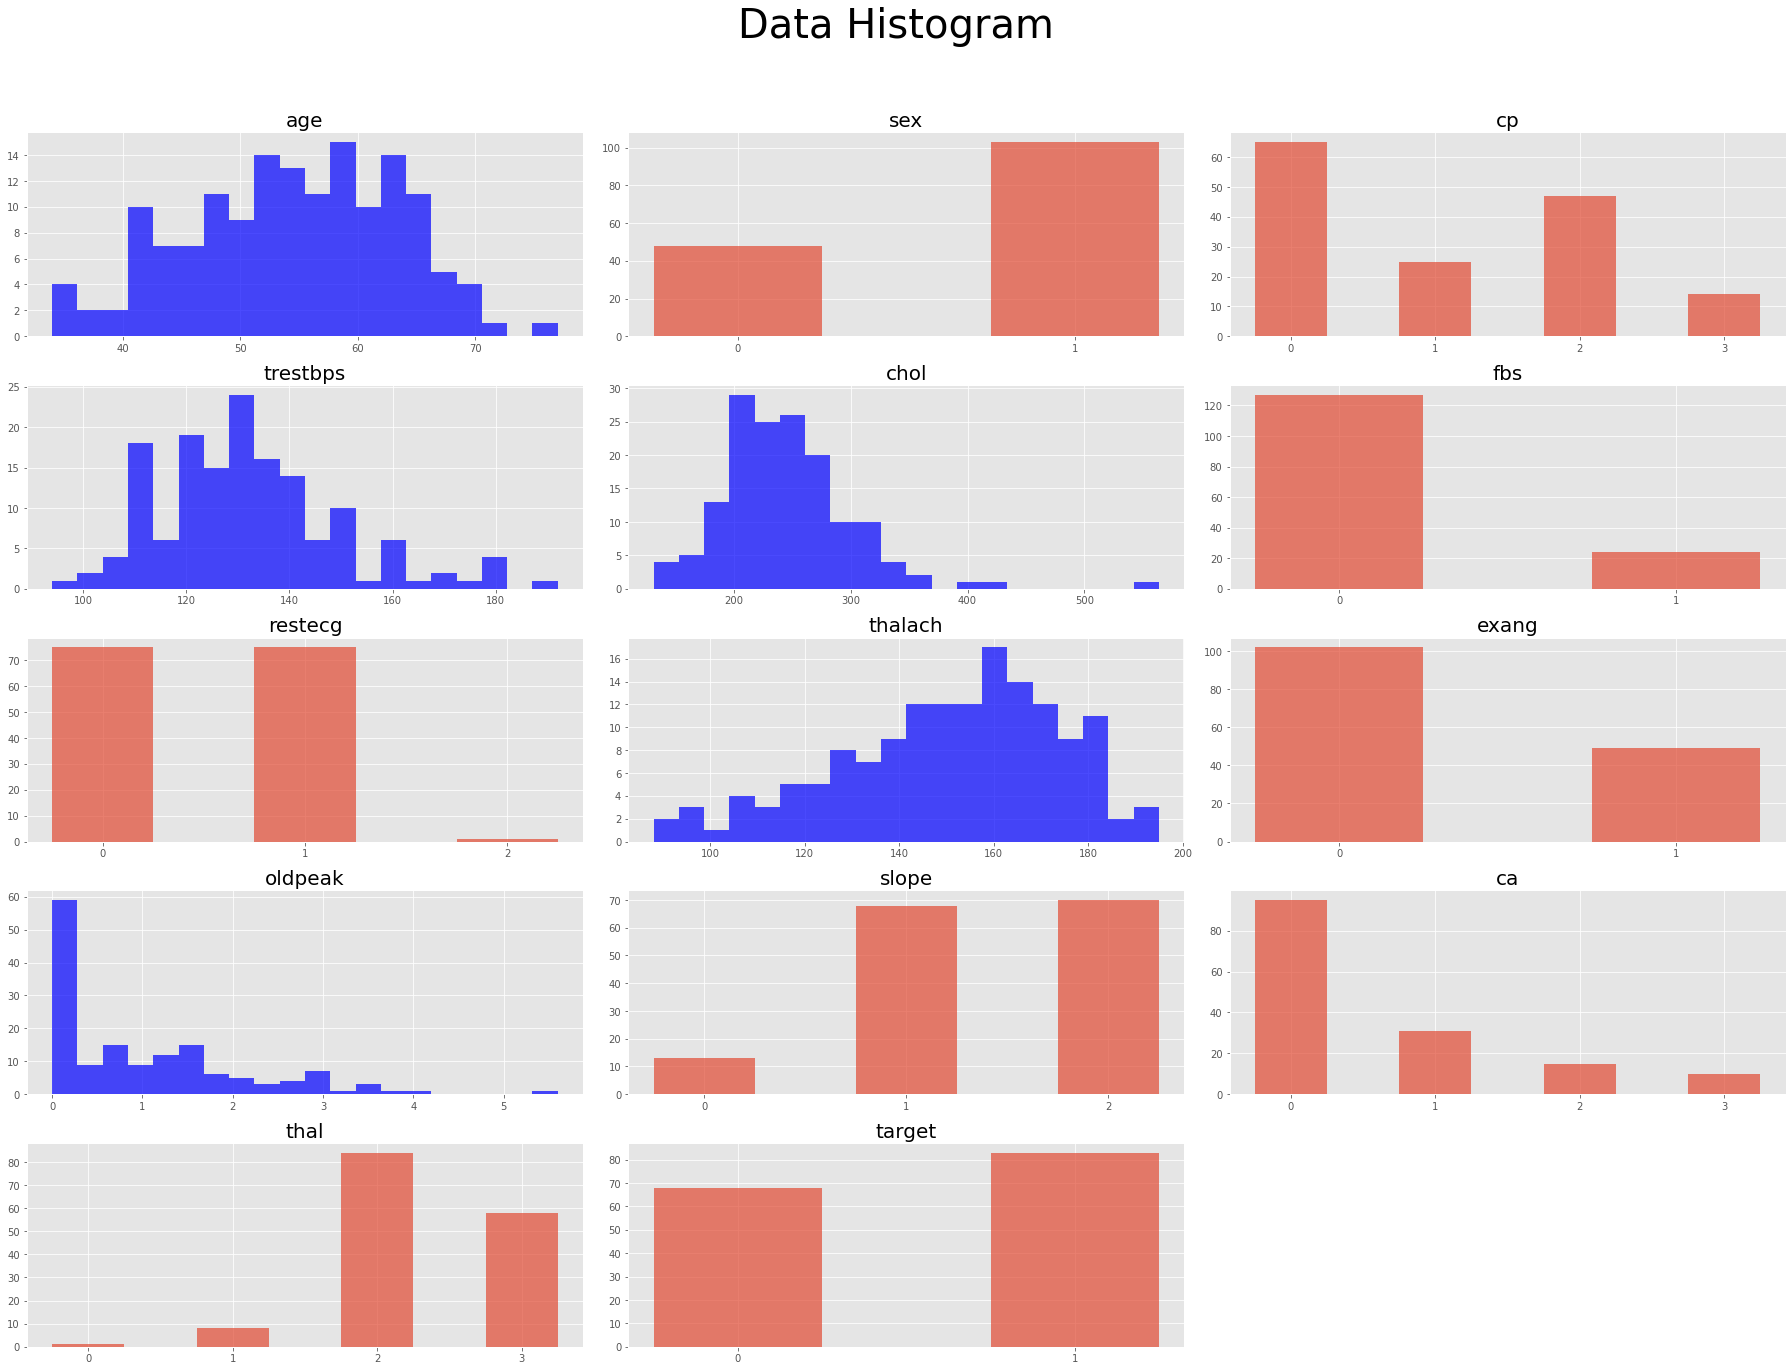

In [29]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = train.columns[1:]
for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

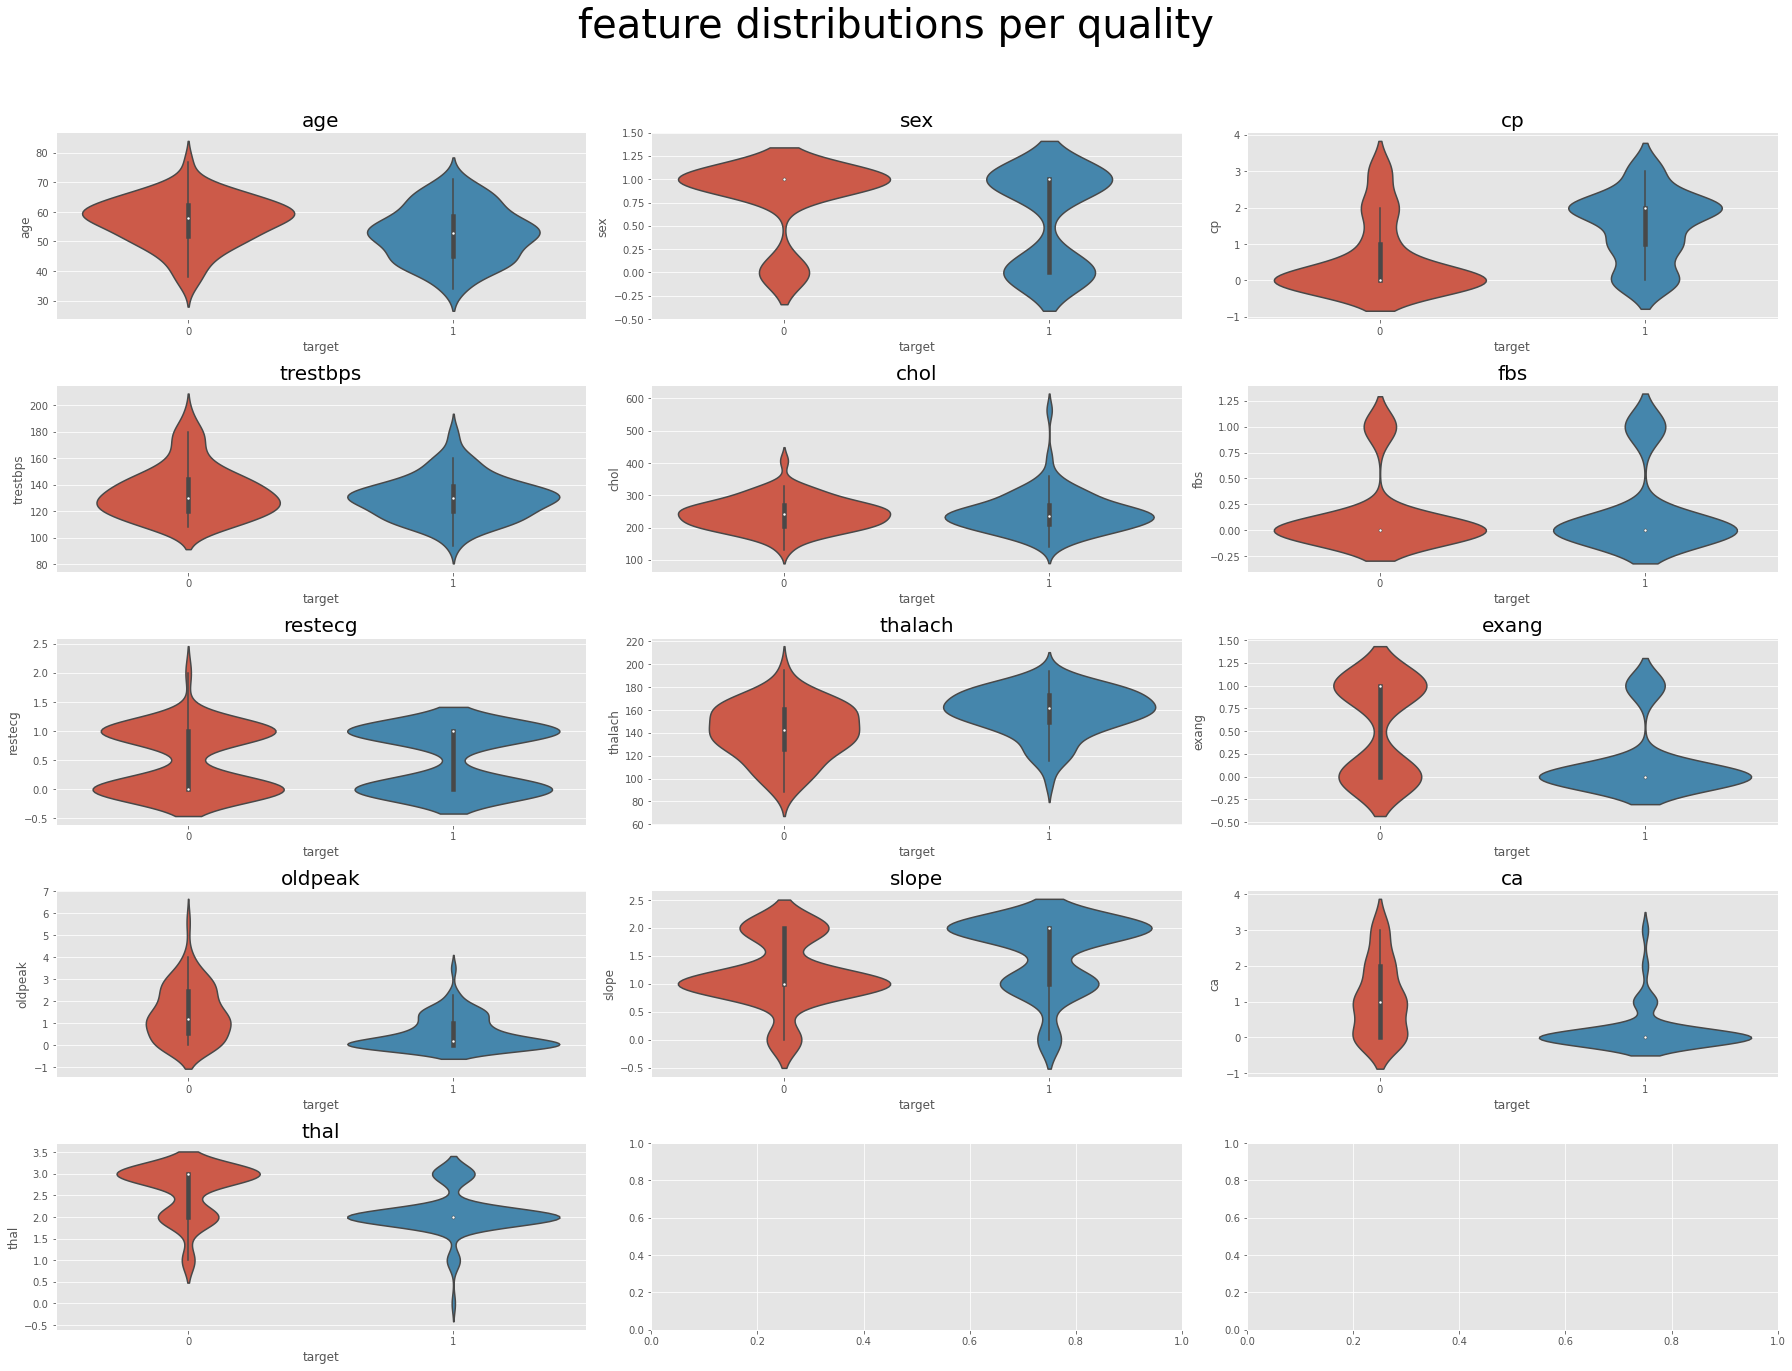

In [30]:
fig, axes = plt.subplots(5, 3, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, train.columns[1:-1]):
    sns.violinplot(x= 'target', y= col, ax=ax, data=train)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 상관관계 체크
-----
- 요약
    - 수치형 데이터 상관관계(12% 수준까지 피처제외시 예측 상승)
        - restecg는 분포문제가 심각했음 -> 클렌징 후 재확인 필요 
        - chol, fbs도 분포문제가 조금 있었음 -> 위 결과에 따라 진행여부 결정
        - testbps는 분포중요도 낮았음 -> 수치형 '낮음' 문제들 제외해도 될듯

    - 범주형 데이터 상관관계(범주와 수치간의 상관계수(파이) 확인 필요)
        - cp, ca 상관관계가 높음
        - target 분포균형은 가장 마지막에 해보자
-----
- target과 feature간의 상관관계 현황
    - 상관관계 낮음(상호독립적): baseline에서 뺏을때 예측률 상승한 피처
        - restecg     0.017528
        - chol        0.036991
        - fbs         0.065821
        - trestbps    0.122850
    - 상관관계 높음(상호의존적)
        - sex         0.246289
        - age         0.247806
        - slope       0.305994
        - thalach     0.365249
        - exang       0.396145
        - oldpeak     0.421514
        - thal        0.428530
        - cp          0.436273
        - ca          0.466289

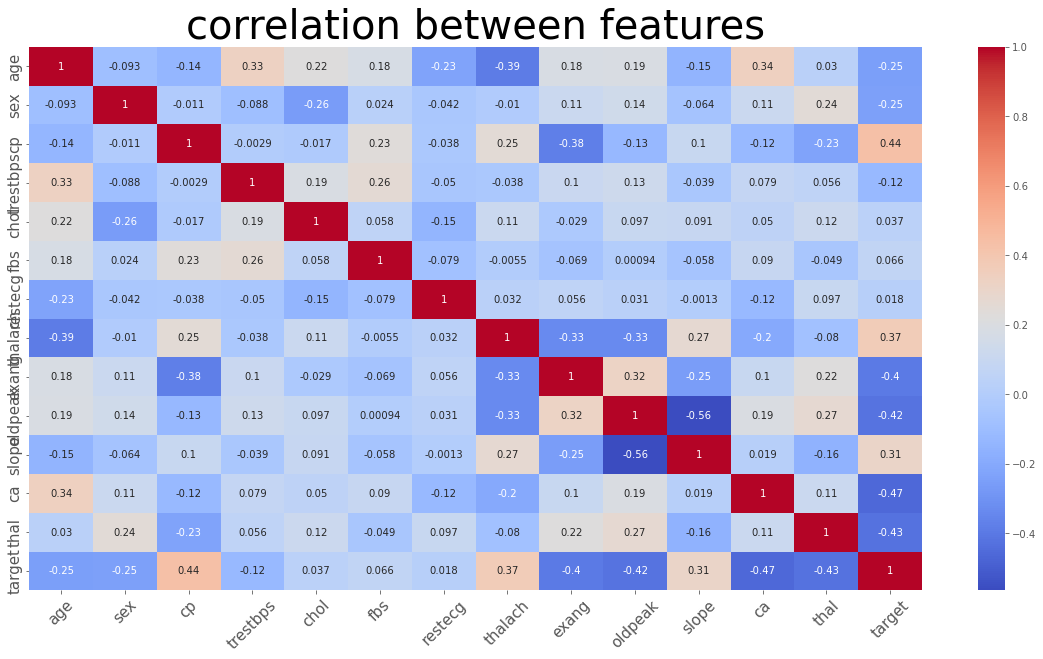

In [31]:
plt.figure(figsize=(20,10))

heat_table = train.drop(['id'], axis=1).corr()
heatmap_ax = sns.heatmap(heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [33]:
# target과 다른 feature들의 상관계수는 아래와 같습니다.
corr_score = abs(heat_table.target[:-1])
# 상관계수 절대값을 기준으로 내림차순으로 정렬합니다.
corr_score.sort_values()

restecg     0.017528
chol        0.036991
fbs         0.065821
trestbps    0.122850
sex         0.246289
age         0.247806
slope       0.305994
thalach     0.365249
exang       0.396145
oldpeak     0.421514
thal        0.428530
cp          0.436273
ca          0.466289
Name: target, dtype: float64

## 데이터 정제
- 결과 요약
- oldpeak이 0.421514에서 0.417375로 더 떨어짐ㅜㅜ 뭥미?
- 극단적이었던 oldpeak 정규분포화 효과 없으므로, 수치형데이터들 정규분포화 안해도 될듯

### 범주형 데이터 null값 제거
- 범주형 ca  4(null)값 확인
- 범주형 thal 0 (null)값 제거
- 수치형 oldpeak 정규분포화
-> 상관분석 다시 체크(피어슨)
 

In [45]:
# 범주형 ca 4(null)값 확인
# int값이라서 밸류카운트가 안먹음, 4없음
train['ca'].unique()

array([0, 1, 3, 2], dtype=int64)

In [52]:
# 범주형 oldpeak 0 (null)값 제거
train['thal'].unique()

array([2, 3, 1, 0], dtype=int64)

In [60]:
# 범주형이니까...가장 많은 값으로 대입하거나 빼야 할 듯
# (train['thal'].values == 0).sum()
train['thal'].astype('object').value_counts()

2    84
3    58
1     8
0     1
Name: thal, dtype: int64

In [69]:
train['thal'].values == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [72]:
# 데이터 수가 적으니 빼지말고 2값으로 대입하자 
train['thal'] = train['thal'].replace(0,2, regex=True)
train['thal'].values

array([2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 3, 2, 2, 3, 1,
       2, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 1, 1, 2, 2, 3, 3,
       3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 1, 3, 1,
       2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 3, 1, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2],
      dtype=int64)

<AxesSubplot:ylabel='Frequency'>

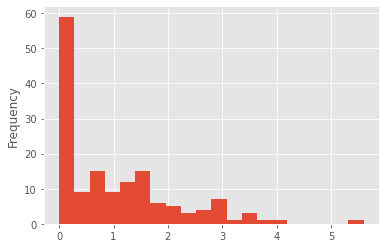

In [77]:
# 3. oldpeak 정규분포화 
train['oldpeak'].plot(kind = 'hist', bins = 20)

Text(0.5, 1.0, 'Log_col')

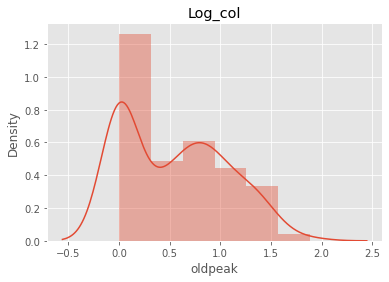

In [79]:
# 데이터수가 너무작으니까 이산값 제거 않고 정규분포화(로그처리)해보자
train['oldpeak'] = np.log1p(train['oldpeak'])
sns.distplot(train['oldpeak'],label="Log_col")
plt.title('Log_col')

<AxesSubplot:ylabel='Frequency'>

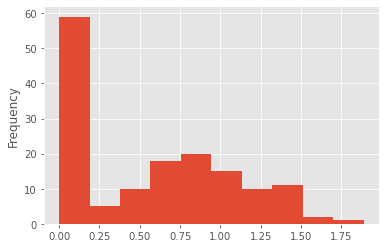

In [81]:
train['oldpeak'].plot(kind = 'hist')

In [86]:
# 상관계수 다시 
heat_table = train.drop(['id'], axis=1).corr()
corr_score = abs(heat_table.target[:-1])
corr_score.sort_values()
# oldpeak이 0.421514에서 0.417375로 더 떨어짐ㅜㅜ 뭥미?
# oldpeak 효과 없는듯, 수치형데이터들 정규분포더 안건드려도 될듯

restecg     0.017528
chol        0.036991
fbs         0.065821
trestbps    0.122850
sex         0.246289
age         0.247806
slope       0.305994
thalach     0.365249
exang       0.396145
oldpeak     0.417375
thal        0.429954
cp          0.436273
ca          0.466289
Name: target, dtype: float64

## 데이터 정규화
- 수치형 데이터 스케일링
- 범주형 데이터 전체 원핫 인코딩


In [92]:
# 수치형 데이터 스케일링 (age, testbps, chol, oldpeak, ca)
train_n = train[['age', 'trestbps', 'chol', 'oldpeak', 'ca']]
train_n

,age,trestbps,chol,oldpeak,ca
0,53,130,197,0.788457,0
1,52,152,298,0.788457,0
2,54,192,283,0.000000,1
3,45,138,236,0.182322,0
4,35,122,192,0.000000,0
...,...,...,...,...,...
146,50,140,233,0.470004,1
147,51,94,227,0.000000,1
148,69,160,234,0.095310,1
149,46,120,249,0.587787,0


In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scale = MinMaxScaler()
train_n_scaled = scale.fit_transform(train_n) # matrix
train_n_scaled[:5]

array([[0.44186047, 0.36734694, 0.15242494, 0.41782102, 0.        ],
       [0.41860465, 0.59183673, 0.38568129, 0.41782102, 0.        ],
       [0.46511628, 1.        , 0.35103926, 0.        , 0.33333333],
       [0.25581395, 0.44897959, 0.24249423, 0.09661623, 0.        ],
       [0.02325581, 0.28571429, 0.1408776 , 0.        , 0.        ]])

In [96]:
train.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,0.788457,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,0.788457,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.000000,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.182322,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.000000,2,0,2,1


In [95]:
# 범주형 데이터 전체 원핫 인코딩 , cp,restecg, slope, thal
# train_c = train[['cp', 'restecg', 'slope', 'thal']]
# train_c

,cp,restecg,slope,thal
0,2,0,0,2
1,3,1,1,3
2,1,0,2,3
3,0,0,1,2
4,1,1,2,2
...,...,...,...,...
146,2,1,1,3
147,2,1,2,3
148,3,0,1,2
149,0,0,2,3


In [97]:
train2 = train.copy()
train2.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,0.788457,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,0.788457,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.000000,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.182322,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.000000,2,0,2,1


In [98]:
# 원핫 인코딩
train2 = pd.get_dummies(train2, columns=['cp', 'restecg', 'slope', 'thal'])
train2

,id,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,...,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_1,thal_2,thal_3
0,1,53,1,130,197,1,152,0,0.788457,0,...,0,1,0,0,1,0,0,0,1,0
1,2,52,1,152,298,1,178,0,0.788457,0,...,1,0,1,0,0,1,0,0,0,1
2,3,54,1,192,283,0,195,0,0.000000,1,...,0,1,0,0,0,0,1,0,0,1
3,4,45,0,138,236,0,152,1,0.182322,0,...,0,1,0,0,0,1,0,0,1,0
4,5,35,1,122,192,0,174,0,0.000000,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,50,1,140,233,0,163,0,0.470004,1,...,0,0,1,0,0,1,0,0,0,1
147,148,51,1,94,227,0,154,1,0.000000,1,...,0,0,1,0,0,0,1,0,0,1
148,149,69,1,160,234,1,131,0,0.095310,1,...,1,1,0,0,0,1,0,0,1,0
149,150,46,1,120,249,0,144,0,0.587787,0,...,0,1,0,0,0,0,1,0,0,1


In [99]:
# 수치형 데이터도 병합
train2[['age', 'trestbps', 'chol', 'oldpeak', 'ca']] = train_n_scaled
train2.head()

,id,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,...,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_1,thal_2,thal_3
0,1,0.441860,1,0.367347,0.152425,1,152,0,0.417821,0.000000,...,0,1,0,0,1,0,0,0,1,0
1,2,0.418605,1,0.591837,0.385681,1,178,0,0.417821,0.000000,...,1,0,1,0,0,1,0,0,0,1
2,3,0.465116,1,1.000000,0.351039,0,195,0,0.000000,0.333333,...,0,1,0,0,0,0,1,0,0,1
3,4,0.255814,0,0.448980,0.242494,0,152,1,0.096616,0.000000,...,0,1,0,0,0,1,0,0,1,0
4,5,0.023256,1,0.285714,0.140878,0,174,0,0.000000,0.000000,...,0,0,1,0,0,0,1,0,1,0


In [100]:
# 상관계수 다시 
heat_table = train2.drop(['id'], axis=1).corr()
corr_score = abs(heat_table.target[:-1])
corr_score.sort_values()

thal_1       0.023613
restecg_0    0.032617
chol         0.036991
restecg_1    0.047250
slope_0      0.054368
cp_3         0.059875
fbs          0.065821
restecg_2    0.090207
trestbps     0.122850
cp_1         0.152497
sex          0.246289
age          0.247806
slope_1      0.331148
slope_2      0.360970
thalach      0.365249
cp_2         0.378493
exang        0.396145
oldpeak      0.417375
ca           0.466289
cp_0         0.503477
thal_2       0.517330
target       1.000000
Name: target, dtype: float64

##  클렌징한 데이터로 다시 상관분석
- 피어슨계수 : 원핫인코딩 효과 있음, 순서대로 다시 단계적 회귀분석하면 좋을 듯
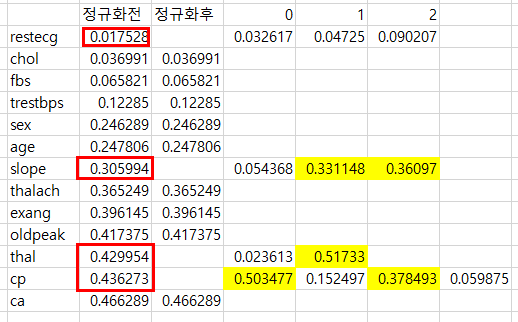
- 파이계수

## 모델링
- valid split 여부 비교
- 하이퍼 파라미터 튜닝 비교(못할듯?)
- 모델 알고리즘 비교 (못할듯?)
- 앙상블 비교(못할듯?)

In [110]:
X = train2.iloc[:, 1:-1] # id와 target을 제거
y = train2.iloc[:, -1] # target만 선택

In [111]:
# 트레인데이터로  예측
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X, y)

logistic_preds = logistic_regression_model.predict(X)

print(f'accuracy: {sum(logistic_preds == y) / len(y)}')
print(f'f1_score : {f1_score(y, logistic_preds)}')

accuracy: 1.0
f1_score : 1.0


In [120]:
# valid로 검증
# 성능 변화 평가를 위해 data 나누기
X = train2.iloc[:, 1:-1] 
Y = train2.iloc[:, -1] 

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.5, shuffle=True, random_state=34)

In [121]:
# 성능 출력 함수
from sklearn.metrics import f1_score

def print_score(predicted, y):
    accuracy = sum(predicted == y) / len(y)*100
    f1 = f1_score(y, predicted)*100
    print(f'accuracy: {accuracy:.2f}%') # 정확도 출력
    print(f'f1_score : {f1:.2f}%') # f1 score 출력
    return accuracy, f1


check_acc = []
check_f1 = []

In [122]:
from sklearn.linear_model import LogisticRegression
#1단계 train 데이터 준비
step_1_train_x = x_train.copy()

#1단계 train
LR_step_1_model = LogisticRegression()
LR_step_1_model.fit(step_1_train_x, y_train)
#1단계 validation 데이터 준비
step_1_val_x = x_val.copy()

#1단계 validaion
LR_step_1_preds = LR_step_1_model.predict(step_1_val_x)
acc, f1 = print_score(LR_step_1_preds, y_val)

check_acc.append(acc)
check_f1.append(f1)

accuracy: 96.05%
f1_score : 94.34%


## 베스트 모델 선정(테스트 예측 및 제출)


In [126]:
#test data 준비
test = pd.read_csv("../dacon_heart/dataset/test.csv")

best_model_test = test.drop(["id","restecg","chol","fbs","trestbps"],axis=1)

# 값을 예측합니다.
prediction = LR_step_1_model.predict(best_model_test)

ValueError: X has 14 features, but LogisticRegression is expecting 22 features as input.